In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('C:/users/igorv/MATHMOD/Coursera/US Police shootings in from 2015-22.csv', sep = ',')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7678,7679,NaN,2022-08-23,shot,machete,48.0,M,NaN,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7679,7680,Geraldo Reyes,2022-08-23,shot,gun,32.0,M,NaN,Cut Off,LA,False,attack,NaN,False,-90.312,29.458,True
7680,7681,NaN,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,MO,False,attack,Foot,False,-94.258,39.023,True


In [3]:
# lets make table with only age and gender, where we will make Male = 1, Female = 0
df2 = df[['age','gender', 'body_camera', 'signs_of_mental_illness']].dropna()
# after clearing dataset, lets make index column comfortable 
df2.index = np.arange(1, len(df2) + 1) 
df2

,age,gender,body_camera,signs_of_mental_illness
1,53.0,M,False,True
2,47.0,M,False,False
3,23.0,M,False,False
4,32.0,M,False,True
5,39.0,M,False,False
...,...,...,...,...
7200,37.0,M,False,False
7201,42.0,F,False,False
7202,41.0,F,False,False
7203,48.0,M,False,False


In [4]:
df2['gender'] = np.where((df2.gender == 'F'), 0, df2.gender )
df2['gender'] = np.where((df2.gender == 'M'), 1, df2.gender )

df2['body_camera'] = np.where((df2.body_camera == 'False'), 0, df2.body_camera )
df2['body_camera'] = np.where((df2.body_camera == 'True'), 1, df2.body_camera )

df2['signs_of_mental_illness'] = np.where((df2.signs_of_mental_illness == 'True'), 1, df2.signs_of_mental_illness )
df2['signs_of_mental_illness'] = np.where((df2.signs_of_mental_illness == 'False'), 0, df2.signs_of_mental_illness )

df2

,age,gender,body_camera,signs_of_mental_illness
1,53.0,1,0,1
2,47.0,1,0,0
3,23.0,1,0,0
4,32.0,1,0,1
5,39.0,1,0,0
...,...,...,...,...
7200,37.0,1,0,0
7201,42.0,0,0,0
7202,41.0,0,0,0
7203,48.0,1,0,0


In [5]:
# as we know, age 0 isnt acceptable, so we centarize it
df2['age_c']=(df2['age']-df2['age'].mean())
df2

,age,gender,body_camera,signs_of_mental_illness,age_c
1,53.0,1,0,1,15.832038
2,47.0,1,0,0,9.832038
3,23.0,1,0,0,-14.167962
4,32.0,1,0,1,-5.167962
5,39.0,1,0,0,1.832038
...,...,...,...,...,...
7200,37.0,1,0,0,-0.167962
7201,42.0,0,0,0,4.832038
7202,41.0,0,0,0,3.832038
7203,48.0,1,0,0,10.832038


In [6]:
reg2 = smf.ols('age ~ gender + body_camera + signs_of_mental_illness', data = df2).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     30.88
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           7.91e-20
Time:                        16:10:46   Log-Likelihood:                -28624.
No. Observations:                7204   AIC:                         5.726e+04
Df Residuals:                    7200   BIC:                         5.728e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

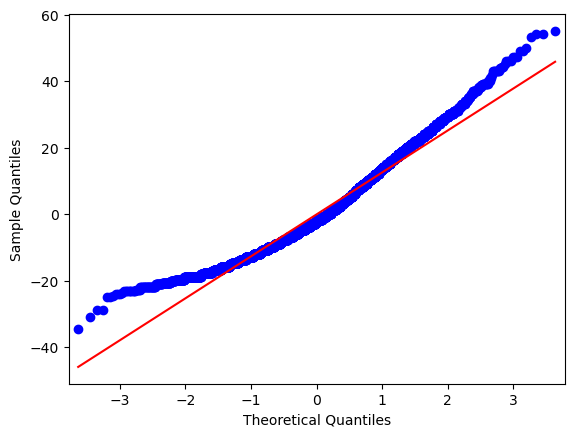

In [7]:
fig1 = sm.qqplot(reg2.resid,line='r') # didnt follow perfect normal distr, might be other explanatory variable

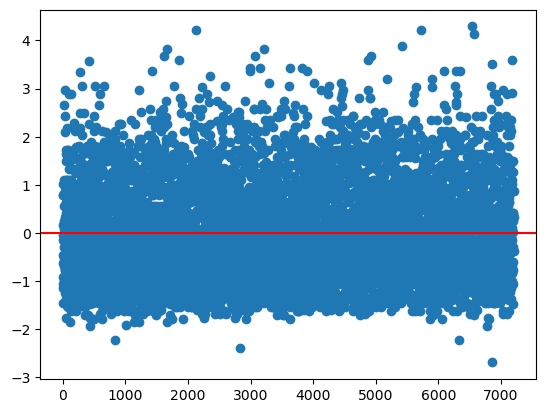

In [8]:
stdres = pd.DataFrame(reg2.resid_pearson)
fig2 = plt.plot(stdres,'o',ls = 'None')
l = plt.axhline(y = 0, color = 'r')

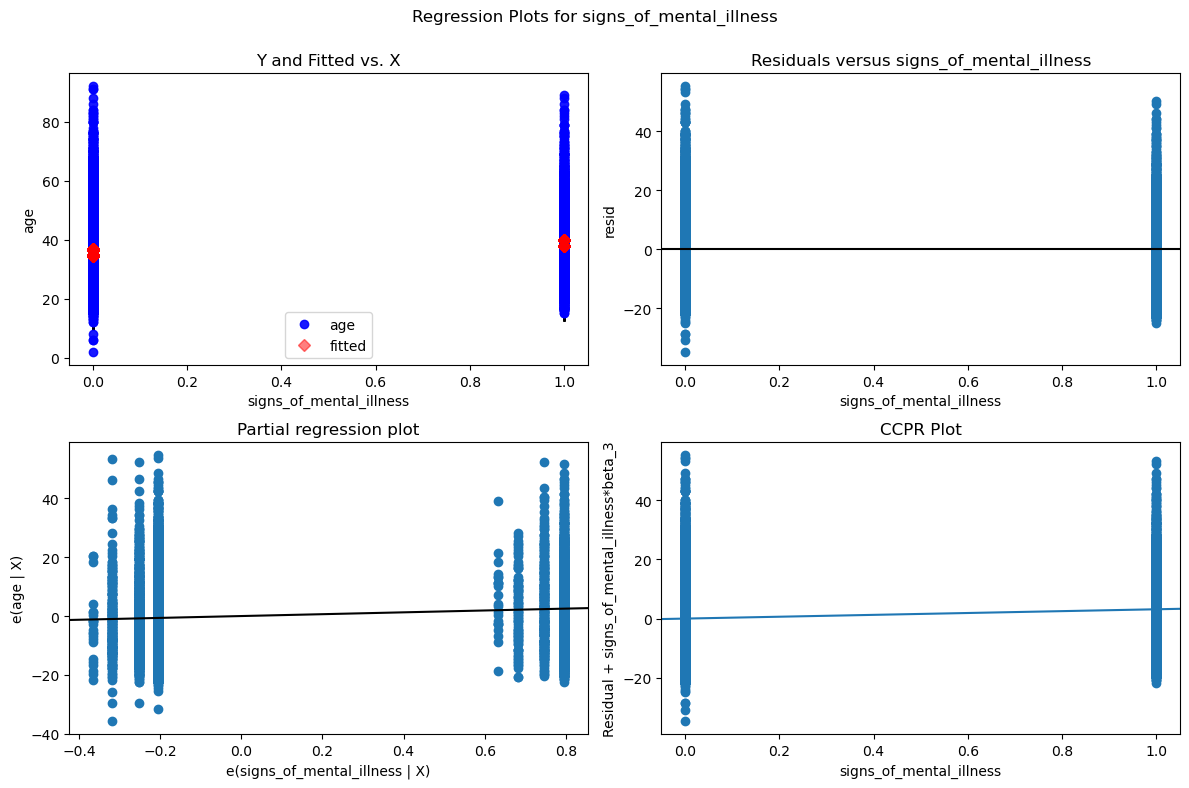

In [9]:
fig3 = plt.figure(figsize = (12,8))
fig3 = sm.graphics.plot_regress_exog(reg2, 'signs_of_mental_illness',fig = fig3)